<a href="https://colab.research.google.com/github/scottspurlock/mlfairness/blob/main/fairness_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fairness Metrics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Make up some ground truth and predicted labels (0 or 1)
ytest = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
ypred = np.array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

sensitive = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

df = pd.DataFrame(list(zip(sensitive, ytest, ypred)), columns=['Sensitive', 'True Label', 'Pred Label'])
df

,Sensitive,True Label,Pred Label
0,0,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,0,1
5,1,1,1
6,0,1,1
7,1,1,0
8,0,1,0
9,0,1,0


# Basic Probability


In [3]:
# P(s=0) : probability that sensitive attribute is 0
num_total = len(sensitive)
num_s0 = np.sum(sensitive == 0)
p = num_s0 / num_total
print('P(s=0) =', p)

# P(ypred=1) : probability that predicted label is 1
num_ypred1 = np.sum(ypred == 1)
p = num_ypred1 / num_total
print('P(ypred=1) =', p)

# P(ypred=1 | s=0) : probability that, given sensitive attribute is 0, predicted label is 1
num_s0 = np.sum(sensitive == 0)
num_ypred1_and_s0 = np.sum((ypred == 1) & (sensitive == 0))
p = num_ypred1_and_s0 / num_s0
print('P(ypred=1 | s=0) =', p)

# P(ypred=1 | s=0, y=1) : probability that, given sensitive attribute is 0 and true label is 1, predicted label is 1
num_s0_y1 = np.sum((ytest == 1) & (sensitive == 0))
num_s0_y1_ypred1 = np.sum((ytest == 1) & (sensitive == 0) & (ypred == 1))
p = num_s0_y1_ypred1 / num_s0_y1
print('P(ypred=1 | s=0, y=1) =', p)

P(s=0) = 0.6
P(ypred=1) = 0.3
P(ypred=1 | s=0) = 0.3333333333333333
P(ypred=1 | s=0, y=1) = 0.3333333333333333


## Fairness
### Demographic parity
P(ypred = 1 | s = 1) - P(ypred = 1 | s = 0)

In [4]:
mask_s0 = sensitive == 0
mask_s1 = sensitive == 1
mask_ypred1 = ypred == 1
count_0 = np.sum(mask_s0 & mask_ypred1)
count_1 = np.sum(mask_s1 & mask_ypred1)

prob0 = count_0 / np.sum(mask_s0)
prob1 = count_1 / np.sum(mask_s1)
demo_par_diff = prob1 - prob0

print('P(ypred=1 | s=0): {:.4f}'.format(prob0))
print('P(ypred=1 | s=1): {:.4f}'.format(prob1))
print('Demographic Parity Score: {:.4f}'.format(demo_par_diff))


P(ypred=1 | s=0): 0.3333
P(ypred=1 | s=1): 0.2500
Demographic Parity Score: -0.0833


### Equality of opportunity
- high income: P(ypred=1 | y=1, s=1) - P(ypred=1 | y=1, s=0)
- low income: P(ypred=1 | y=0, s=1) - P(ypred=1 | y=0, s=0)

In [5]:
mask_s0 = sensitive == 0
mask_s1 = sensitive == 1
mask_ypred1 = ypred == 1
mask_y0 = ytest == 0
mask_y1 = ytest == 1

# Low income version
count0 = np.sum(mask_s0 & mask_ypred1 & mask_y0)
count1 = np.sum(mask_s1 & mask_ypred1 & mask_y0)
prob0 = count0 / np.sum(mask_s0 & mask_y0)
prob1 = count1 / np.sum(mask_s1 & mask_y0)

print('Equality of opportunity score (low income):', prob1 - prob0)

# High income version
count0 = np.sum(mask_s0 & mask_ypred1 & mask_y1)
count1 = np.sum(mask_s1 & mask_ypred1 & mask_y1)
prob0 = count0 / np.sum(mask_s0 & mask_y1)
prob1 = count1 / np.sum(mask_s1 & mask_y1)

print('Equality of opportunity score (high income):', prob1 - prob0)


Equality of opportunity score (low income): -0.3333333333333333
Equality of opportunity score (high income): 0.16666666666666669


# Classification

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.40      0.50         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



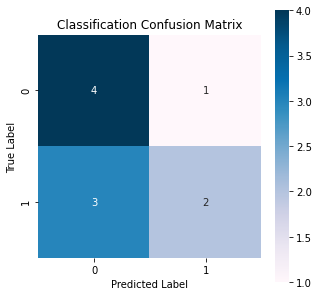

In [6]:
print(classification_report(ytest, ypred))

cm = confusion_matrix(ytest, ypred)


plt.figure(figsize=(5, 5))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu")

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Classification Confusion Matrix')
plt.show()


## Basic classification metrics
https://en.wikipedia.org/wiki/Precision_and_recall

In [7]:
# Accuracy
correct_count = np.sum(ytest == ypred)
acc = correct_count / ytest.shape[0]

# True positive
tp = np.sum((ytest == ypred) & (ytest == 1))
tpr = tp / ytest.shape[0]

# True negative
tn = np.sum((ytest == ypred) & (ytest == 0))
tnr = tn / ytest.shape[0]

# False positive
fp = np.sum((ytest != ypred) & (ypred == 1))
fpr = fp / ytest.shape[0]

# False negative
fn = np.sum((ytest != ypred) & (ypred == 0))
fnr = fn / ytest.shape[0]

# Class 0 recall - how many of the true class 0 examples were predicted correctly?
n0_true = np.sum(ytest == 0)
recall0 = tn / n0_true

# Class 1 recall - how many of the true class 1 examples were predicted correctly?
n1_true = np.sum(ytest == 1)
recall1 = tp / n1_true

# Class 0 precision - how many of the predicted class 0 examples were actually class 0?
n0_pred = np.sum(ypred == 0)
prec0 = tn / n0_pred

# Class 1 precision - how many of the predicted class 1 examples were actually class 1?
n1_pred = np.sum(ypred == 1)
prec1 = tp / n1_pred

# Class 0 f1 score
f10 = 2*tn / (2*tn + fp + fn)

# Class 1 f1 score
f11 = 2*tp / (2*tp + fp + fn)

print('Accuracy: {:.4f}  TPR: {:.4f}  TNR: {:.4f}  FPR: {:.4f}  FNR: {:.4f}'.format(acc, tpr, tnr, fpr, fnr))
print('Class 0 recall: {:.4f}  Class 1 recall: {:.4f}  Class 0 precision: {:.4f}  Class 1 precision: {:.4f}'.format(recall0, recall1, prec0, prec1))
print('Class 0 f1 score: {:.4f}  Class 1 f1 score: {:.4f}'.format(f10, f11))

Accuracy: 0.6000  TPR: 0.2000  TNR: 0.4000  FPR: 0.1000  FNR: 0.3000
Class 0 recall: 0.8000  Class 1 recall: 0.4000  Class 0 precision: 0.5714  Class 1 precision: 0.6667
Class 0 f1 score: 0.6667  Class 1 f1 score: 0.5000
